# ROBUT

## Preliminaries

In [81]:
import sys
sys.path.append('..')

In [82]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [83]:
from ctrl.block.linear import Feedback, Gain
from ctrl.block.logger import Logger

In [84]:
from ctrl.client import Controller
#HOST, PORT = "localhost", 9999
HOST, PORT = "192.168.10.101", 9999
robut = Controller(host = HOST, port = PORT)

In [85]:
print(robut.info('all'))

> Controller with 9 device(s), 10 signal(s), 7 source(s), 2 sink(s), and 0 filter(s)
> devices
  1. encoder1[source]
  2. encoder2[source]
  3. clock[source]
  4. mic2[source]
  5. mic1[source]
  6. motor2[sink]
  7. motor1[sink]
  8. prox1[source]
  9. prox2[source]
> signals
  1. clock
  2. encoder1
  3. encoder2
  4. is_running
  5. mic1
  6. mic2
  7. motor1
  8. motor2
  9. prox1
  10. prox2
> sources
  1. clock[enabled] >> clock
  2. encoder1[enabled] >> encoder1
  3. encoder2[enabled] >> encoder2
  4. mic1[enabled] >> mic1
  5. mic2[enabled] >> mic2
  6. prox1[enabled] >> prox1
  7. prox2[enabled] >> prox2
> filters
> sinks
  1. motor1 >> motor1[enabled]
  2. motor2 >> motor2[enabled]



## Setup logger and read mics and proxs

In [86]:
robut.add_sink('logger',Logger(),['clock','mic1','mic2','prox1','prox2'])

In [87]:
robut.set_sink('logger', reset=True)
with robut:
    time.sleep(5);

In [88]:
log = robut.read_sink('logger')

In [89]:
t = log[:,0]
mic1 = log[:,1]
mic2 = log[:,2]
prox1 = log[:,3]
prox2 = log[:,4]

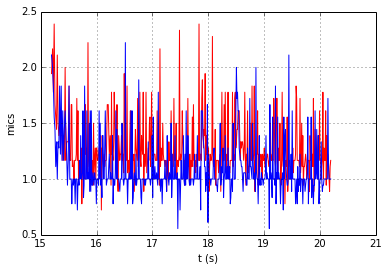

In [90]:
plt.plot(t, mic1, 'r')
plt.plot(t, mic2, 'b')
# the next lines will make the plot look nicer
plt.xlabel('t (s)')
plt.ylabel('mics')
plt.grid()

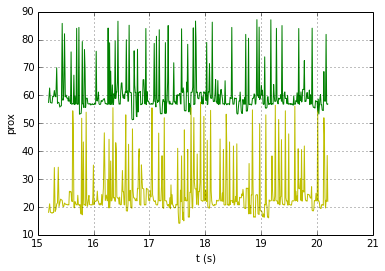

In [91]:
plt.plot(t, prox1, 'g')
plt.plot(t, prox2, 'y')
# the next lines will make the plot look nicer
plt.xlabel('t (s)')
plt.ylabel('prox')
plt.grid()

## Install feedback controller

In [92]:
robut.add_signal('reference1')

In [93]:
robut.add_sink('logger',Logger(),['clock','mic1','mic2','prox1','prox2','motor1','motor2'])
print(robut.info('sinks'))

> sinks
  1. motor1 >> motor1[disabled]
  2. motor2 >> motor2[disabled]
  3. clock, mic1, mic2, prox1, prox2, motor1, motor2 >> logger[enabled]



In [106]:
Kp = 1
robut.add_filter('controller', 
                 Feedback(block = Gain(gain = Kp)),
                 ['prox2', 'reference1'], 
                 ['motor1'])

In [107]:
print(robut.info('all'))

> Controller with 9 device(s), 11 signal(s), 7 source(s), 3 sink(s), and 1 filter(s)
> devices
  1. encoder1[source]
  2. encoder2[source]
  3. clock[source]
  4. mic2[source]
  5. mic1[source]
  6. motor2[sink]
  7. motor1[sink]
  8. prox1[source]
  9. prox2[source]
> signals
  1. clock
  2. encoder1
  3. encoder2
  4. is_running
  5. mic1
  6. mic2
  7. motor1
  8. motor2
  9. prox1
  10. prox2
  11. reference1
> sources
  1. clock[enabled] >> clock
  2. encoder1[enabled] >> encoder1
  3. encoder2[enabled] >> encoder2
  4. mic1[enabled] >> mic1
  5. mic2[enabled] >> mic2
  6. prox1[enabled] >> prox1
  7. prox2[enabled] >> prox2
> filters
  1. prox2, reference1 >> controller[enabled] >> motor1
> sinks
  1. motor1 >> motor1[disabled]
  2. motor2 >> motor2[disabled]
  3. clock, mic1, mic2, prox1, prox2, motor1, motor2 >> logger[enabled]



In [112]:
robut.set_signal('reference1',0)
robut.set_sink('logger',reset=True)
with robut:
    time.sleep(10)

In [109]:
log = robut.read_sink('logger')

t = log[:,0]
mic1 = log[:,1]
mic2 = log[:,2]
prox1 = log[:,3]
prox2 = log[:,4]
motor1 = log[:,5]
motor2 = log[:,6]

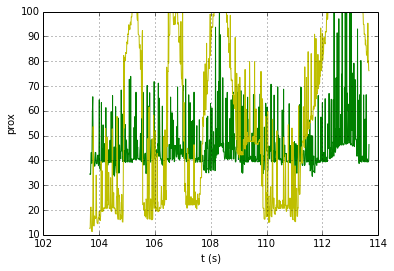

In [110]:
plt.plot(t, prox1, 'g')
plt.plot(t, prox2, 'y')
# the next lines will make the plot look nicer
plt.xlabel('t (s)')
plt.ylabel('prox')
plt.grid()

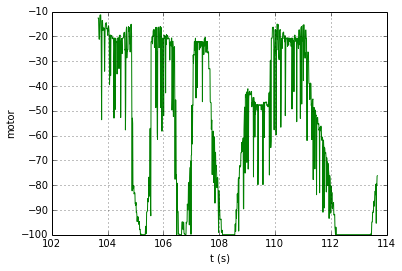

In [111]:
plt.plot(t, motor1, 'g')
# the next lines will make the plot look nicer
plt.xlabel('t (s)')
plt.ylabel('motor')
plt.grid()